# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, classification_report, roc_auc_score, confusion_matrix

# Defining required functions

In [2]:
def lab_encode(df,column):
    label_encoder = preprocessing.LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    return df

In [3]:
def one_hot_encoder(df,columns):
    ohe=OneHotEncoder(handle_unknown="ignore", sparse=False)
    for i in columns:
        x=pd.DataFrame(ohe.fit_transform(df[[i]]), columns=df[i].unique())
        df = pd.concat([x,df], axis=1, join="inner").drop(i,axis=1)
    return df

In [4]:
def robust_scaler(df):
    scaler = RobustScaler()
    df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns, index=df.index)
    return df

In [5]:
def basic_processing(df):
    print("Basic Information : \n")
    df.info()
    print("\n\nCorrelation plot : \n")
    sns.heatmap(df.corr(), annot=True)
    plt.show()
    print("\n\nDescriptive Statistics : \n")
    return df.describe()

# Importing the Datasets

In [6]:
train = pd.read_csv("D:\Study\Excelr DS\Assignments\AS-12-Naive-Bayes\SalaryData_Train.csv")
test = pd.read_csv("D:\Study\Excelr DS\Assignments\AS-12-Naive-Bayes\SalaryData_Test.csv")

In [7]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Data Description:

age -- age of a person

workclass	-- A work class is a grouping of work

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

# Training Dataset

We shall first process the training dataset

### Basic Information and descriptives:

Basic Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


Correlation plot : 



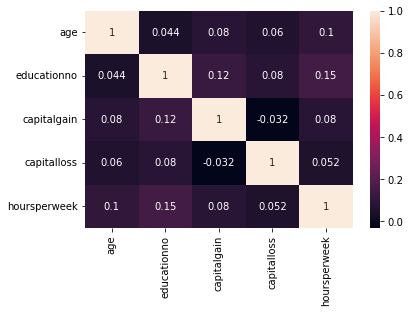



Descriptive Statistics : 



,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
basic_processing(train)

#### Inferences :

1. There are 30161 entries with 14 features. 
2. There are no null values in the dataset.
3. The average age of the people included in the dataset is 38 years, with minimum and maximum age of 17 and 90 years respectively.
4. The average capital gain from the sale of investment is 1092, with minimum and maximum values as zero and 99999 respectively.
5. The average capital loss from the sale of investment is 88, with minimum and maximum values as zero and 4356 respectively.

### Encoding the variables:

In [10]:
# creating a copy:
train_1 = train.copy()

In [11]:
#removing unnecessary columns:
train_1.drop(["native"], axis="columns",inplace=True)

In [12]:
#encoding y variable
train_1 = lab_encode(train_1,"Salary")
train_1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0


In [13]:
#encoding x variable
columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex"]
train_1 = one_hot_encoder(train_1,columns)
train_1

,Male,Female,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Not-in-family,Husband,Wife,...,Federal-gov,Local-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,39,13,2174,0,40,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,50,13,0,0,13,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,38,9,0,0,40,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,53,7,0,0,40,0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28,13,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27,12,0,0,38,0
30157,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,40,9,0,0,40,1
30158,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,58,9,0,0,40,0
30159,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,22,9,0,0,20,0


### Scaling the dataset

In [14]:
scaled_train = robust_scaler(train_1)
scaled_train

,Male,Female,White,Black,Asian-Pac-Islander,Amer-Indian-Eskimo,Other,Not-in-family,Husband,Wife,...,Federal-gov,Local-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.105263,0.75,2174.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.684211,0.75,0.0,0.0,-5.4,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.052632,-0.25,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.842105,-0.75,0.0,0.0,0.0,0.0
4,1.0,-1.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.473684,0.75,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.526316,0.50,0.0,0.0,-0.4,0.0
30157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.157895,-0.25,0.0,0.0,0.0,1.0
30158,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.105263,-0.25,0.0,0.0,0.0,0.0
30159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.789474,-0.25,0.0,0.0,-4.0,0.0


The training dataset is ready to use in the model. Now we shall process the test dataset

# Testing Dataset

### Basic Information and descriptives:

Basic Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


Correlation plot : 



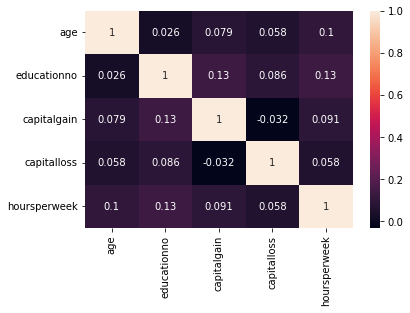



Descriptive Statistics : 



,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [15]:
basic_processing(test)

#### Inferences :

1. There are 15060 entries with 14 features. 
2. There are no null values in the dataset.
3. The average age of the people included in the dataset is 38 years, with minimum and maximum age of 17 and 90 years respectively.
4. The average capital gain from the sale of investment is 1120, with minimum and maximum values as zero and 99999 respectively.
5. The average capital loss from the sale of investment is 89, with minimum and maximum values as zero and 3770 respectively.

### Encoding the variables:

In [16]:
# creating a copy:
test_1 = test.copy()

In [17]:
#removing unnecessary columns:
test_1.drop(["native"], axis="columns",inplace=True)

In [18]:
#encoding y variable
test_1 = lab_encode(test_1,"Salary")
test_1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,0


In [19]:
#encoding x variable
columns = ["workclass","education","maritalstatus","occupation","relationship","race","sex"]
test_1 = one_hot_encoder(test_1,columns)
test_1

,Male,Female,Black,White,Other,Amer-Indian-Eskimo,Asian-Pac-Islander,Own-child,Husband,Not-in-family,...,Federal-gov,State-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,25,7,0,0,40,0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,9,0,0,50,0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28,12,0,0,40,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44,10,7688,0,40,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,34,6,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,33,13,0,0,40,0
15056,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,39,13,0,0,36,0
15057,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,38,13,0,0,50,0
15058,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44,13,5455,0,40,0


### Scaling the dataset

In [20]:
scaled_test = robust_scaler(test_1)
scaled_test

,Male,Female,Black,White,Other,Amer-Indian-Eskimo,Asian-Pac-Islander,Own-child,Husband,Not-in-family,...,Federal-gov,State-gov,Self-emp-inc,Without-pay,age,educationno,capitalgain,capitalloss,hoursperweek,Salary
0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.60,-0.75,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.05,-0.25,0.0,0.0,2.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.45,0.50,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.35,0.00,7688.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,-0.15,-1.00,0.0,0.0,-2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.20,0.75,0.0,0.0,0.0,0.0
15056,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.10,0.75,0.0,0.0,-0.8,0.0
15057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.05,0.75,0.0,0.0,2.0,0.0
15058,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.35,0.75,5455.0,0.0,0.0,0.0


# Model Fitting

In [21]:
x_train = scaled_train.iloc[:,0:62]
y_train = scaled_train.iloc[:,62]

x_test = scaled_test.iloc[:,0:62]
y_test = scaled_test.iloc[:,62]

In [22]:
gnb = GaussianNB()
gnb.fit(x_train, y_train) 

GaussianNB()

In [23]:
# making predictions on the testing set
y_pred = gnb.predict(x_test)

C:\Users\Zarna\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [24]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("The accuracy of the model is : ", accuracy_score(y_test, y_pred)*100)

The accuracy of the model is :  80.55112881806109


Text(83.40000000000006, 0.5, 'predicted label')

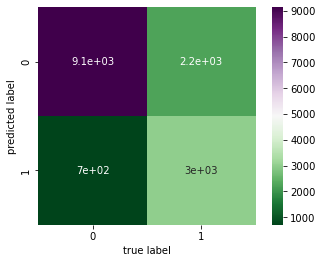

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='PRGn_r')
plt.xlabel('true label')
plt.ylabel('predicted label')

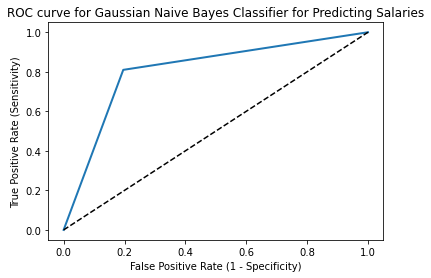

model AUC score: 0.8069335268366958


In [26]:
# plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
print(f'model AUC score: {roc_auc_score(y_test, y_pred)}')

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86     11360
         1.0       0.57      0.81      0.67      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.81      0.77     15060
weighted avg       0.84      0.81      0.82     15060

